In [1]:
pip install tensorflow-macos

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached h5py-3.15.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (3.0 kB)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-4.25.8-cp37-abi3-macosx_10_9_universal2.whl.metadata (541 bytes)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached termcolor-3.2.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-2.0.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (9.0 kB)
  Using cached grpcio-1.76.0-cp311-cp311-macosx_11_0_universal2.whl.metadata (3.7 kB)
  Using cached tensorboard-2.16.2-py3

In [2]:
pip install tensorflow-metal

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 2.6 MB/s  0:00:00 eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
print("Built with GPU support:", tf.test.is_built_with_gpu_support())
print("Is GPU available:", tf.test.is_gpu_available())

Built with GPU support: False
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is GPU available: True


2025-11-21 12:39:34.936957: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4 Max
2025-11-21 12:39:34.937006: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2025-11-21 12:39:34.937014: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 14.04 GB
2025-11-21 12:39:34.937065: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-21 12:39:34.937083: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pillow-12.0.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (8.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 2.8 MB/s  0:00:03 eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 3.3 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 2.1 MB/s  0:00:02 eta 0:00:01
Using cached pyparsing-3.2.5-py3-none-any.whl (113 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

  Using cached pandas-2.3.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (91 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pandas-2.3.3-cp311-cp311-macosx_11_0_arm64.whl (10.8 MB)
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)
Using cached tzdata-2025.2-py2.py3-none-any.whl (347 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [seaborn]m2/4 [pandas]
Note: you may need to restart the kernel to use updated packages.


# CNN Model Solution

## Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

### Constants

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 1
AUTOTUNE = tf.data.AUTOTUNE

TRAIN_DIR = "/Users/tiyanigurusinghe/Desktop/Projects/mri_scans_tumor_classification/dataset/Training"
TEST_DIR = "/Users/tiyanigurusinghe/Desktop/Projects/mri_scans_tumor_classification/dataset/Testing"

## Load Dataset

In [44]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    validation_split=0.2,
    subset="training",
    seed=42,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    validation_split=0.2,
    subset="validation",
    seed=42,
    shuffle=False
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    labels="inferred",
    label_mode="int",
    color_mode="grayscale",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=False
)

class_names = train_ds.class_names
n_classes = len(class_names)
print("Classes:", class_names)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.
Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


## EDA

### Checking class names

In [45]:
class_names = train_ds.class_names
print(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


#### Count Images per Class

In [5]:
def count_images(directory):
    counts = {}
    for cls in sorted(os.listdir(directory)):
        cls_path = os.path.join(directory, cls)
        if os.path.isdir(cls_path):
            counts[cls] = len(os.listdir(cls_path))
    return counts

print("Training Image Count:")
print(count_images(TRAIN_DIR))

print("\nTesting Image Count:")
print(count_images(TEST_DIR))

Training Image Count:
{'glioma': 1321, 'meningioma': 1339, 'notumor': 1595, 'pituitary': 1457}

Testing Image Count:
{'glioma': 300, 'meningioma': 306, 'notumor': 405, 'pituitary': 300}


### Visualizing Images

2025-11-21 13:39:24.257458: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


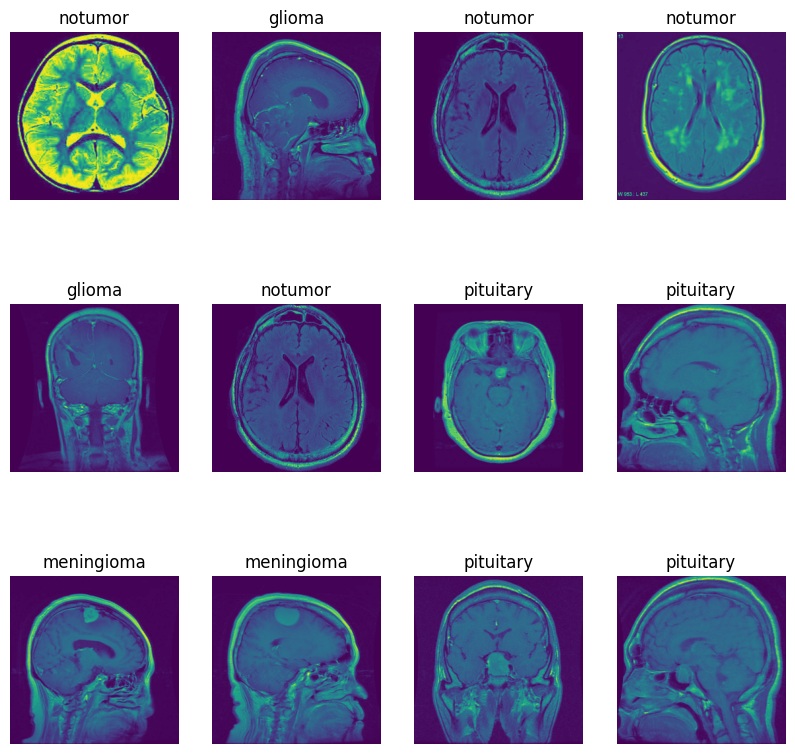

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

### Sample Images (per class)

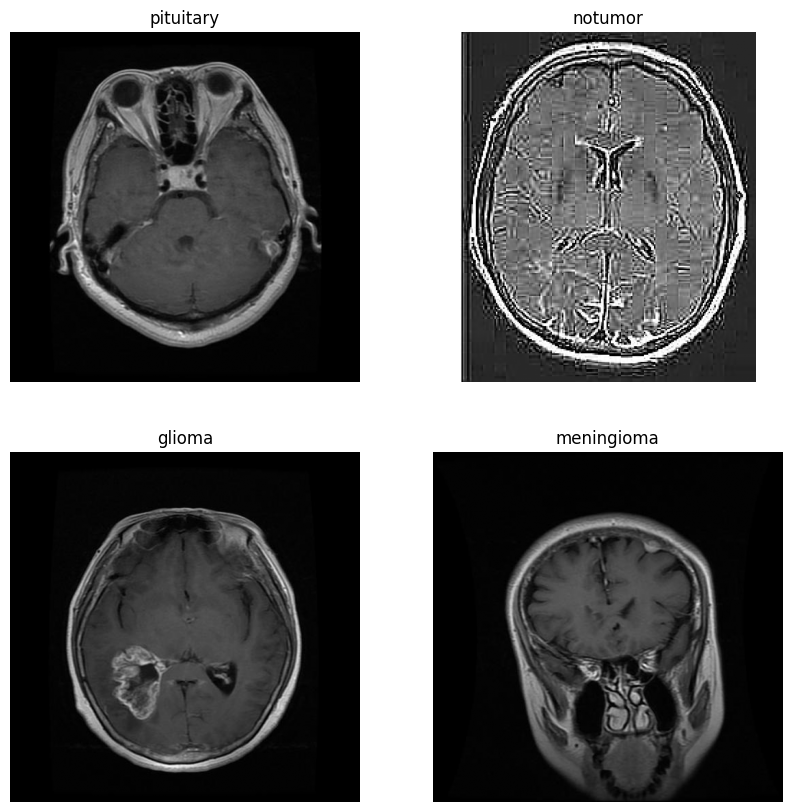

In [11]:
def show_sample_images(directory):
    plt.figure(figsize=(10, 10))

    classes = [c for c in os.listdir(directory)
               if not c.startswith(".") and os.path.isdir(os.path.join(directory, c))]

    for i, cls in enumerate(classes):
        cls_path = os.path.join(directory, cls)

        # get only image files, ignore .DS_Store
        images = [f for f in os.listdir(cls_path) if not f.startswith(".")]
        sample_img = images[0]

        img_path = os.path.join(cls_path, sample_img)
        img = image.load_img(img_path, color_mode="grayscale")

        plt.subplot(2, 2, i + 1)
        plt.imshow(img, cmap="gray")
        plt.title(cls)
        plt.axis("off")

show_sample_images(TRAIN_DIR)

### Pixel Intensity Histogram

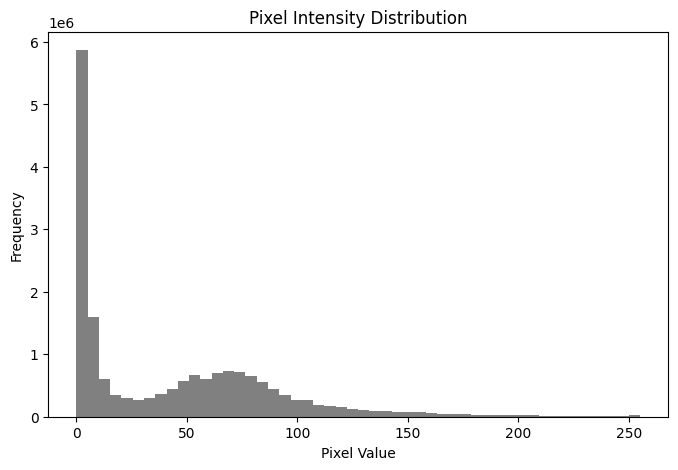

In [13]:
def plot_intensity_hist(directory):
    imgs = []
    for cls in os.listdir(directory):
        if cls.startswith("."):
            continue
        cls_path = os.path.join(directory, cls)
        for img_name in os.listdir(cls_path)[:20]:  # sample first 20 images
            path = os.path.join(cls_path, img_name)
            img = image.load_img(path, color_mode="grayscale")
            imgs.append(np.array(img).flatten())

    imgs = np.concatenate(imgs)
    plt.figure(figsize=(8,5))
    plt.hist(imgs, bins=50, color='gray')
    plt.title("Pixel Intensity Distribution")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.show()

plot_intensity_hist(TRAIN_DIR)

### Image Size Distribution

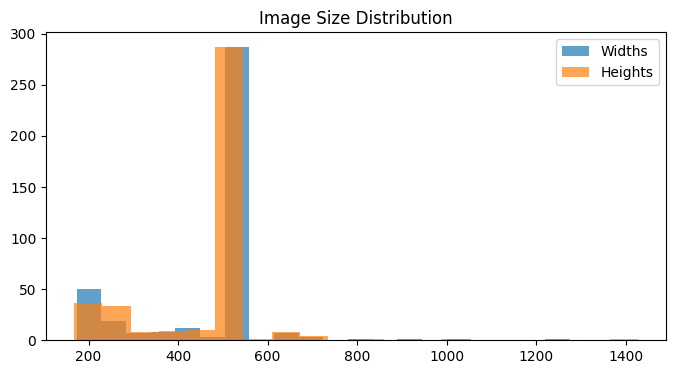

In [15]:
def size_distribution(directory):
    sizes = []
    for cls in os.listdir(directory):
        if cls.startswith("."):
            continue
        cls_path = os.path.join(directory, cls)
        for img_name in os.listdir(cls_path)[:100]:
            path = os.path.join(cls_path, img_name)
            img = image.load_img(path, color_mode="grayscale")
            sizes.append(img.size)

    widths = [s[0] for s in sizes]
    heights = [s[1] for s in sizes]

    plt.figure(figsize=(8,4))
    plt.hist(widths, bins=20, alpha=0.7, label="Widths")
    plt.hist(heights, bins=20, alpha=0.7, label="Heights")
    plt.legend()
    plt.title("Image Size Distribution")
    plt.show()

size_distribution(TRAIN_DIR)

### Detect Corrupted Images

In [16]:
def detect_corrupted_images(directory):
    corrupted = []
    for cls in os.listdir(directory):
        if cls.startswith("."):
            continue
        cls_path = os.path.join(directory, cls)
        for img_name in os.listdir(cls_path):
            path = os.path.join(cls_path, img_name)
            try:
                _ = image.load_img(path)
            except:
                corrupted.append(path)
    return corrupted

corrupted_files = detect_corrupted_images(TRAIN_DIR)
print("Corrupted Images:", corrupted_files)

Corrupted Images: []


## Model Data Prep

### Prefetch + Cache

In [7]:
train_ds = train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
val_ds   = val_ds.cache().prefetch(AUTOTUNE)
test_ds  = test_ds.cache().prefetch(AUTOTUNE)

## Model

### Preprocessing Layers

In [8]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255),
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.1),
])

### Building Model

In [ ]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model = models.Sequential([
    layers.Input(shape=input_shape),

    resize_and_rescale,  # 1) resize + normalize pixels
    data_augmentation,   # 2) random flips / rotations during training

    layers.Conv2D(32, (3,3), padding="same", activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), padding="same", activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), padding="same", activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), padding="same", activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2,2),

    # Classifier head
    layers.Flatten(), # flatten feature maps
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),

    layers.Dense(n_classes, activation='softmax')
])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 256, 256, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,169,284 (65.50 MB)

 Trainable params: 17,167,812 (65.49 MB)

 Non-trainable params: 1,472 (5.75 KB)

### Compile and Train

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)

model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    "../saved_models/1.h5",
    monitor='val_loss',
    save_best_only=True
)

EPOCHS = 50

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Epoch 1/50


2025-11-21 13:41:00.451883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 124ms/step - accuracy: 0.6779 - loss: 0.9556 - val_accuracy: 0.0000e+00 - val_loss: 1.4968
Epoch 2/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 118ms/step - accuracy: 0.7479 - loss: 0.7040 - val_accuracy: 0.4877 - val_loss: 1.0398
Epoch 3/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 114ms/step - accuracy: 0.8053 - loss: 0.5629 - val_accuracy: 0.0061 - val_loss: 2.2941
Epoch 4/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.8151 - loss: 0.5360 - val_accuracy: 0.3538 - val_loss: 1.2935
Epoch 5/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 118ms/step - accuracy: 0.8274 - loss: 0.4869 - val_accuracy: 0.9028 - val_loss: 0.2499
Epoch 6/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 118ms/step - accuracy: 0.8385 - loss: 0.4549 - val_accuracy: 0.8170 - val_loss: 0.4614
Epoch 7/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.8451 - loss: 0.4292 - val_accuracy: 0.9702 - val_loss: 0.0990
Epoch 8/50
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.8532 - loss: 0.4081 -

### Training accuracy and training loss curve

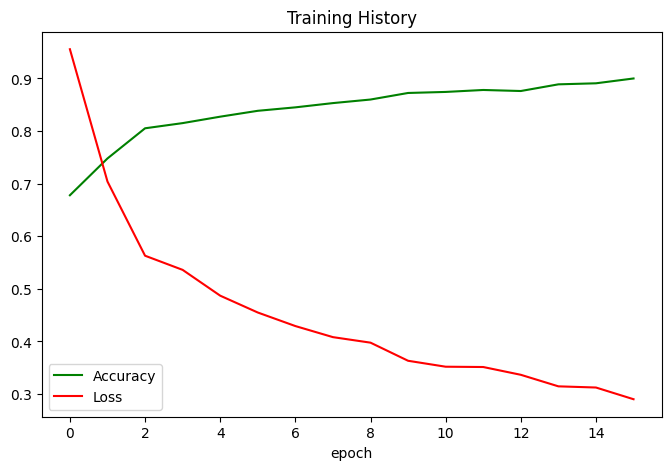

In [12]:
import matplotlib.pyplot as plt

acc  = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

plt.figure(figsize=(8,5))
plt.plot(epochs, acc,  'g-', label='Accuracy')
plt.plot(epochs, loss, 'r-', label='Loss')
plt.title('Training History')
plt.xlabel('epoch')
plt.legend()
plt.show()

### Validation curves

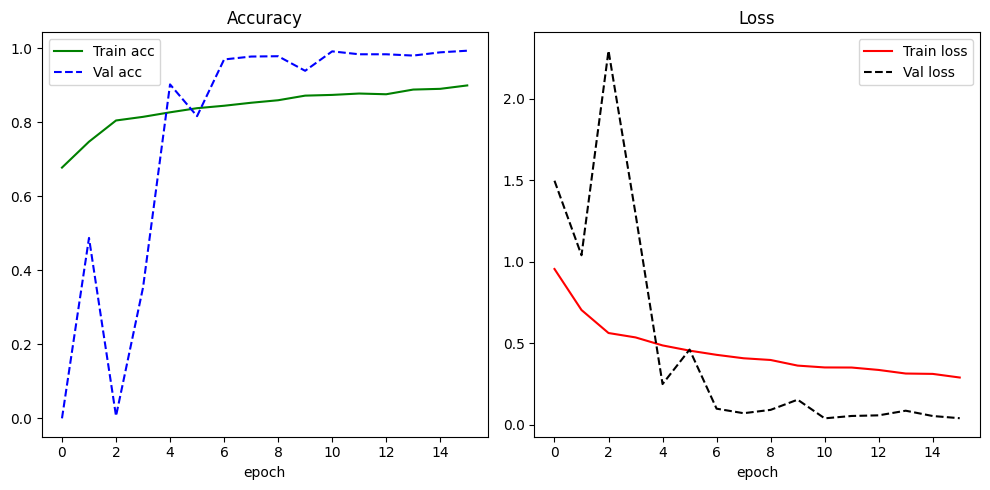

In [13]:
val_acc  = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(epochs, acc,     'g-', label='Train acc')
plt.plot(epochs, val_acc, 'b--', label='Val acc')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(epochs, loss,     'r-', label='Train loss')
plt.plot(epochs, val_loss, 'k--', label='Val loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()

plt.tight_layout()
plt.show()

## Evaluation

### Evaluate on Separate Test Set

In [14]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test Accuracy:", test_acc)

41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7735 - loss: 0.7424
Test Accuracy: 0.7734553813934326


###  Confusion Matrix + Per-Class Accuracy

Predictions

In [15]:
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

2025-11-21 13:52:45.150378: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Confusion Matrix

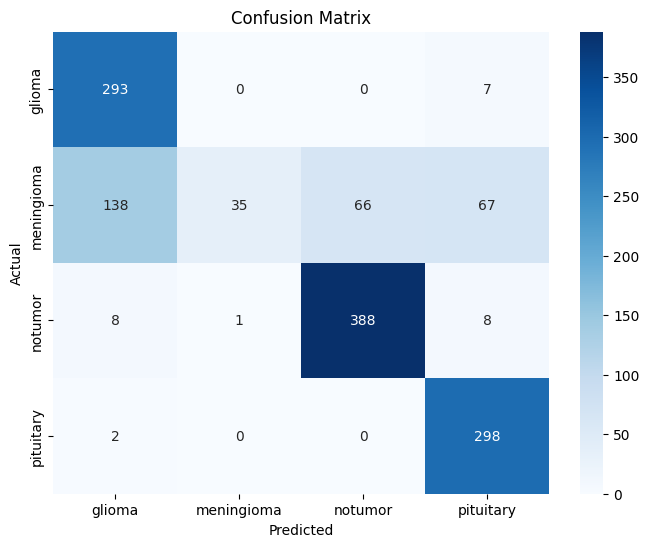

In [16]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Per-Class Accuracy

In [17]:
cm = np.array(cm)
class_accuracy = cm.diagonal() / cm.sum(axis=1)

for name, acc in zip(class_names, class_accuracy):
    print(f"{name}: {acc:.2f}")

glioma: 0.98
meningioma: 0.11
notumor: 0.96
pituitary: 0.99


Classification Reprt

In [18]:
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

      glioma       0.66      0.98      0.79       300
  meningioma       0.97      0.11      0.20       306
     notumor       0.85      0.96      0.90       405
   pituitary       0.78      0.99      0.88       300

    accuracy                           0.77      1311
   macro avg       0.82      0.76      0.69      1311
weighted avg       0.82      0.77      0.71      1311



# EfficientNetB0 - Transfer Learning

##  Reload data for transfer learning

In [20]:
# Training + Validation (80/20 split) – RGB this time
tl_train_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    validation_split=0.2,
    subset="training",
    seed=42,
    shuffle=True
)

tl_val_ds = tf.keras.utils.image_dataset_from_directory(
    TRAIN_DIR,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    validation_split=0.2,
    subset="validation",
    seed=42,
    shuffle=False
)

tl_test_ds = tf.keras.utils.image_dataset_from_directory(
    TEST_DIR,
    labels="inferred",
    label_mode="int",
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=False
)

class_names = tl_train_ds.class_names
n_classes   = len(class_names)
print("Classes:", class_names)

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.
Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']


In [21]:
# Pipeline optimizations
tl_train_ds = tl_train_ds.cache().shuffle(1000).prefetch(AUTOTUNE)
tl_val_ds   = tl_val_ds.cache().prefetch(AUTOTUNE)
tl_test_ds  = tl_test_ds.cache().prefetch(AUTOTUNE)

##  Building transfer-learning model (EfficientNetB0)

- Tumor boundaries and structures are often:
	-	faint
	-	low-contrast
	-	local texture variations
	-	non-uniform shapes

- EfficientNet’s early layers contain optimized edge, texture, and blob detectors trained on millions of natural images.
These generalize extremely well to medical textures.
- Large models like ResNet50 or VGG16 tend to overfit unless we have >10k images.

In [22]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

# Base model with ImageNet weights, without the top classifier
base_model = EfficientNetB0(
    include_top=False,
    weights="imagenet",
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3),
    pooling="avg"        # global average pooling on last conv feature map
)

base_model.trainable = False   # 1) freeze all layers for feature extraction

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step


### Classifier head on top

In [24]:
inputs = tf.keras.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

# Preprocess for EfficientNet
x = preprocess_input(inputs)

# Pass through frozen base model
x = base_model(x, training=False)

# Task-specific head
x = layers.Dropout(0.4)(x)
outputs = layers.Dense(n_classes, activation="softmax")(x)

tl_model = tf.keras.Model(inputs, outputs)
tl_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         5,124 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,054,695 (15.47 MB)

 Trainable params: 5,124 (20.02 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

### Train frozen base model (feature extractor stage)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

tl_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

tl_early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

tl_ckpt = ModelCheckpoint(
    "../saved_models/2.h5",
    monitor="val_loss",
    save_best_only=True
)

TL_EPOCHS = 30

tl_history = tl_model.fit(
    tl_train_ds,
    validation_data=tl_val_ds,
    epochs=TL_EPOCHS,
    callbacks=[tl_early_stop, tl_ckpt],
    verbose=1
)

Epoch 1/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 18s 92ms/step - accuracy: 0.3989 - loss: 1.3125 - val_accuracy: 0.7487 - val_loss: 1.0017
Epoch 2/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.6068 - loss: 0.9860 - val_accuracy: 0.8809 - val_loss: 0.7628
Epoch 3/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.6956 - loss: 0.8240 - val_accuracy: 0.8958 - val_loss: 0.6539
Epoch 4/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 74ms/step - accuracy: 0.7405 - loss: 0.7269 - val_accuracy: 0.9037 - val_loss: 0.5680
Epoch 5/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 74ms/step - accuracy: 0.7796 - loss: 0.6472 - val_accuracy: 0.9282 - val_loss: 0.4764
Epoch 6/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - accuracy: 0.7886 - loss: 0.6075 - val_accuracy: 0.9335 - val_loss: 0.4317
Epoch 7/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 75ms/step - accuracy: 0.8072 - loss: 0.5734 - val_accuracy: 0.9413 - val_loss: 0.3977
Epoch 8/30
143/143 ━━━━━━━━━━━━━━━━━━━━ 11s 76ms/step - accuracy: 0.8232 - loss: 0.5340 - 

### Plot training curves for transfer-learning model

In [26]:
import matplotlib.pyplot as plt
import numpy as np

def plot_full_training_curves(history):
    # Extract history
    hist = history.history
    
    # Required keys — only plot if available
    acc      = hist.get("accuracy")
    val_acc  = hist.get("val_accuracy")
    loss     = hist.get("loss")
    val_loss = hist.get("val_loss")
    precision     = hist.get("precision")
    val_precision = hist.get("val_precision")
    recall        = hist.get("recall")
    val_recall    = hist.get("val_recall")

    epochs = range(len(loss))

    # Best epoch (minimum val_loss)
    best_epoch = np.argmin(val_loss) if val_loss is not None else None

    plt.figure(figsize=(16, 12))

    # ---------------- LOSS ----------------
    plt.subplot(2, 2, 1)
    plt.plot(epochs, loss, 'r-', label='Training loss')
    if val_loss is not None:
        plt.plot(epochs, val_loss, 'g-', label='Validation loss')
        plt.scatter(best_epoch, val_loss[best_epoch], color='blue', s=80,
                    label=f"Best epoch = {best_epoch}")
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # ---------------- ACCURACY ----------------
    plt.subplot(2, 2, 2)
    plt.plot(epochs, acc, 'r-', label='Training Accuracy')
    if val_acc is not None:
        plt.plot(epochs, val_acc, 'g-', label='Validation Accuracy')
        plt.scatter(best_epoch, val_acc[best_epoch], color='blue', s=80)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # ---------------- PRECISION ----------------
    if precision is not None:
        plt.subplot(2, 2, 3)
        plt.plot(epochs, precision, 'r-', label='Precision')
        if val_precision is not None:
            plt.plot(epochs, val_precision, 'g-', label='Validation Precision')
            plt.scatter(best_epoch, val_precision[best_epoch], color='blue', s=80)
        plt.title('Precision and Validation Precision')
        plt.xlabel('Epoch')
        plt.ylabel('Precision')
        plt.legend()

    # ---------------- RECALL ----------------
    if recall is not None:
        plt.subplot(2, 2, 4)
        plt.plot(epochs, recall, 'r-', label='Recall')
        if val_recall is not None:
            plt.plot(epochs, val_recall, 'g-', label='Validation Recall')
            plt.scatter(best_epoch, val_recall[best_epoch], color='blue', s=80)
        plt.title('Recall and Validation Recall')
        plt.xlabel('Epoch')
        plt.ylabel('Recall')
        plt.legend()

    plt.tight_layout()
    plt.show()

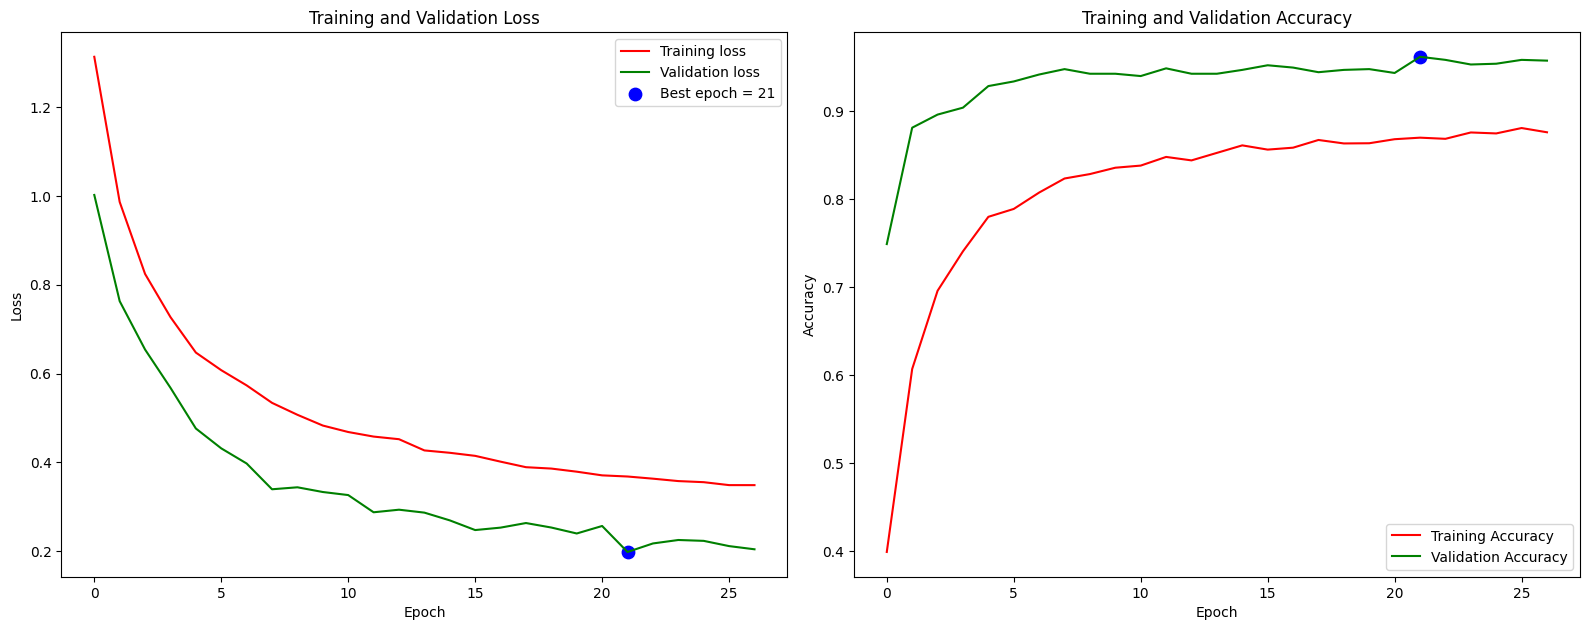

In [28]:
plot_full_training_curves(tl_history)

## Model Evaluation

In [29]:
test_loss, test_acc = tl_model.evaluate(tl_test_ds, verbose=1)
print(f"Transfer Learning Test Accuracy: {test_acc:.4f}")
print(f"Transfer Learning Test Loss    : {test_loss:.4f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.8398 - loss: 0.3851
Transfer Learning Test Accuracy: 0.8398
Transfer Learning Test Loss    : 0.3851


###  Get Predictions & True Labels

In [30]:
y_true = []
y_pred = []

for images, labels in tl_test_ds:
    preds = tl_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

2025-11-21 14:04:13.362047: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


### Confusion Matrix + Heatmap

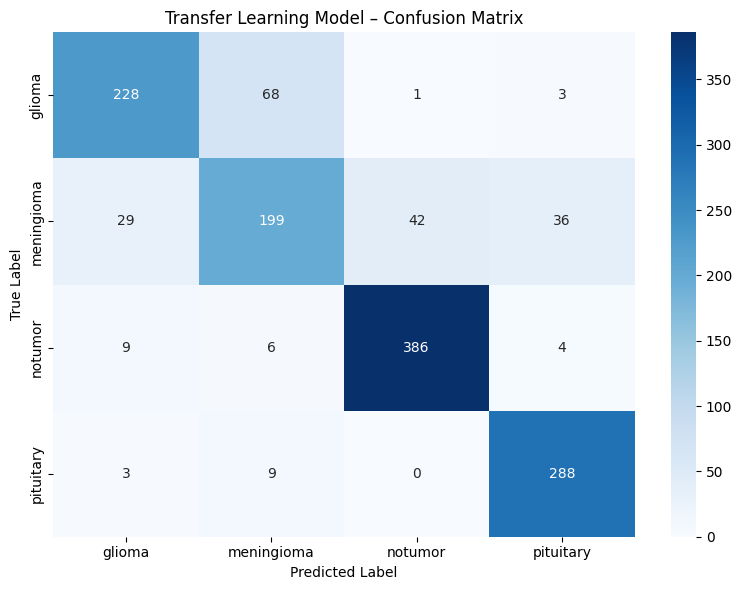

In [31]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Transfer Learning Model – Confusion Matrix")
plt.tight_layout()
plt.show()

##  Fine-tuning top layers

In [36]:
# Unfreeze top N layers of base model for fine-tuning
fine_tune_at = len(base_model.layers) - 20  # last 20 layers

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
for layer in base_model.layers[fine_tune_at:]:
    layer.trainable = True

tl_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # even smaller LR
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

fine_early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

fine_ckpt = ModelCheckpoint(
    "../saved_models/3.h5",
    monitor="val_loss",
    save_best_only=True
)

FINE_EPOCHS = 20

fine_history = tl_model.fit(
    tl_train_ds,
    validation_data=tl_val_ds,
    epochs=FINE_EPOCHS,
    callbacks=[fine_early_stop, fine_ckpt],
    verbose=1
)



Epoch 1/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.9394 - loss: 0.1908

143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 109ms/step - accuracy: 0.9376 - loss: 0.1884 - val_accuracy: 0.9799 - val_loss: 0.0821
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9358 - loss: 0.1828

143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.9411 - loss: 0.1816 - val_accuracy: 0.9799 - val_loss: 0.0816
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9402 - loss: 0.1778

143/143 ━━━━━━━━━━━━━━━━━━━━ 12s 87ms/step - accuracy: 0.9398 - loss: 0.1782 - val_accuracy: 0.9807 - val_loss: 0.0815
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9429 - loss: 0.1653

143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9449 - loss: 0.1676 - val_accuracy: 0.9799 - val_loss: 0.0770
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9437 - loss: 0.1723

143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9457 - loss: 0.1662 - val_accuracy: 0.9799 - val_loss: 0.0763
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.9485 - loss: 0.1653

143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 88ms/step - accuracy: 0.9505 - loss: 0.1616 - val_accuracy: 0.9807 - val_loss: 0.0736
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9511 - loss: 0.1548

143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.9490 - loss: 0.1551 - val_accuracy: 0.9816 - val_loss: 0.0691
Epoch 8/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.9528 - loss: 0.1482

143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9501 - loss: 0.1511 - val_accuracy: 0.9825 - val_loss: 0.0667
Epoch 9/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 89ms/step - accuracy: 0.9567 - loss: 0.1430 - val_accuracy: 0.9825 - val_loss: 0.0676
Epoch 10/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.9591 - loss: 0.1382

143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 90ms/step - accuracy: 0.9556 - loss: 0.1412 - val_accuracy: 0.9842 - val_loss: 0.0603
Epoch 11/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9523 - loss: 0.1419

143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 91ms/step - accuracy: 0.9586 - loss: 0.1345 - val_accuracy: 0.9851 - val_loss: 0.0593
Epoch 12/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 13s 93ms/step - accuracy: 0.9582 - loss: 0.1302 - val_accuracy: 0.9834 - val_loss: 0.0605
Epoch 13/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9598 - loss: 0.1278

143/143 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - accuracy: 0.9597 - loss: 0.1265 - val_accuracy: 0.9869 - val_loss: 0.0539
Epoch 14/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.9649 - loss: 0.1198

143/143 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step - accuracy: 0.9632 - loss: 0.1239 - val_accuracy: 0.9877 - val_loss: 0.0526
Epoch 15/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9674 - loss: 0.1174

143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 133ms/step - accuracy: 0.9678 - loss: 0.1163 - val_accuracy: 0.9877 - val_loss: 0.0513
Epoch 16/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 0.9613 - loss: 0.1183

143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 148ms/step - accuracy: 0.9615 - loss: 0.1191 - val_accuracy: 0.9877 - val_loss: 0.0511
Epoch 17/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - accuracy: 0.9683 - loss: 0.1119

143/143 ━━━━━━━━━━━━━━━━━━━━ 21s 143ms/step - accuracy: 0.9663 - loss: 0.1106 - val_accuracy: 0.9877 - val_loss: 0.0490
Epoch 18/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.9692 - loss: 0.1114

143/143 ━━━━━━━━━━━━━━━━━━━━ 19s 130ms/step - accuracy: 0.9674 - loss: 0.1126 - val_accuracy: 0.9877 - val_loss: 0.0474
Epoch 19/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 116ms/step - accuracy: 0.9689 - loss: 0.1044 - val_accuracy: 0.9869 - val_loss: 0.0474
Epoch 20/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.9672 - loss: 0.1035

143/143 ━━━━━━━━━━━━━━━━━━━━ 17s 119ms/step - accuracy: 0.9689 - loss: 0.1035 - val_accuracy: 0.9886 - val_loss: 0.0424


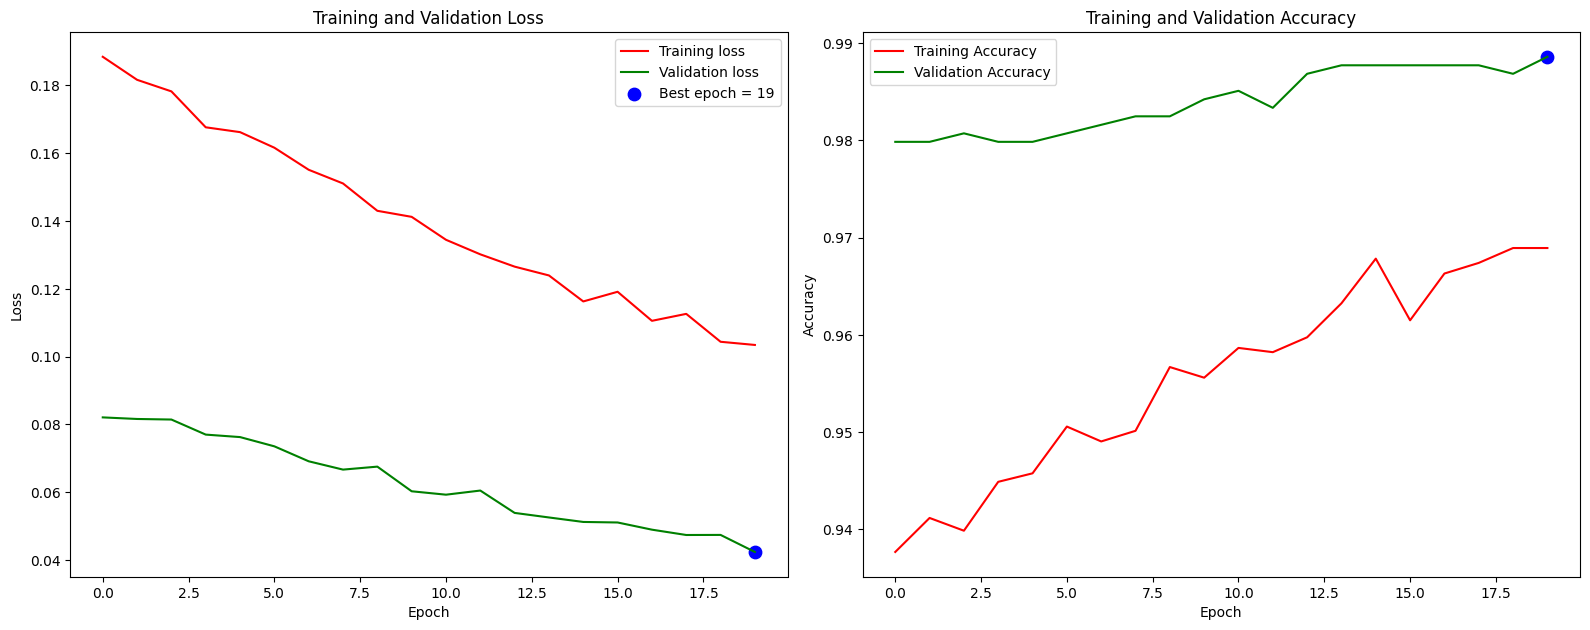

In [37]:
plot_full_training_curves(fine_history)

## Evalution after Fine tuning

In [38]:
test_loss, test_acc = tl_model.evaluate(tl_test_ds)
print(f"Transfer-learning Test accuracy: {test_acc:.4f}, Test loss: {test_loss:.4f}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.9489 - loss: 0.1303
Transfer-learning Test accuracy: 0.9489, Test loss: 0.1303


In [50]:
# Hard-coded image path
IMG_PATH = "/Users/tiyanigurusinghe/Desktop/Projects/mri_scans_tumor_classification/dataset/Training/glioma/Tr-gl_0011.jpg"
TARGET_SIZE = (256, 256)
class_names = train_ds.class_names


In [51]:
def predict_brain_scan(model, img_path, class_names, target_size=(256, 256)):
    # 1. Load & preprocess image (size must match model input)
    img = tf.keras.utils.load_img(img_path, target_size=target_size)
    img_array = tf.keras.utils.img_to_array(img)

    # If you DID NOT add a Rescaling(1./255) layer inside the model, uncomment:
    # img_array = img_array / 255.0

    img_array = tf.expand_dims(img_array, axis=0)  # shape: (1, 256, 256, 3)

    # 2. Predict
    preds = model.predict(img_array)        # shape: (1, 4)
    probs = tf.nn.softmax(preds[0]).numpy()  # convert to probabilities

    # 3. Get top class
    top_idx = np.argmax(probs)
    predicted_label = class_names[top_idx]
    confidence = probs[top_idx]

    # 4. Print nicely
    print(f"\n✅ Predicted class: {predicted_label}")
    print(f"   Confidence: {confidence:.4f} ({confidence*100:.2f}%)\n")

    print("Class probabilities:")
    for i, (cls, p) in enumerate(zip(class_names, probs)):
        print(f"  {i}: {cls:10s} -> {p:.4f} ({p*100:.2f}%)")

    return predicted_label, confidence

# ---- run it ----
label, conf = predict_brain_scan(tl_model, IMG_PATH, class_names)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

✅ Predicted class: glioma
   Confidence: 0.4693 (46.93%)

Class probabilities:
  0: glioma     -> 0.4693 (46.93%)
  1: meningioma -> 0.1784 (17.84%)
  2: notumor    -> 0.1758 (17.58%)
  3: pituitary  -> 0.1764 (17.64%)


### Further Metrics

2025-11-21 14:10:57.026020: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


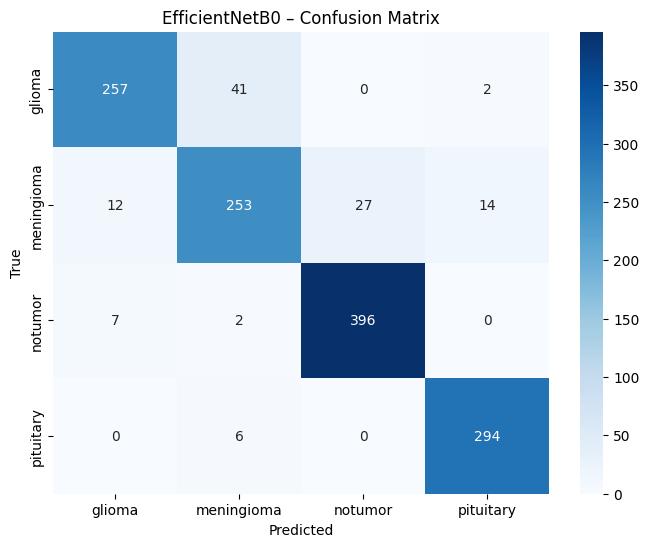

              precision    recall  f1-score   support

      glioma       0.93      0.86      0.89       300
  meningioma       0.84      0.83      0.83       306
     notumor       0.94      0.98      0.96       405
   pituitary       0.95      0.98      0.96       300

    accuracy                           0.92      1311
   macro avg       0.91      0.91      0.91      1311
weighted avg       0.91      0.92      0.91      1311



In [35]:
# Collect predictions
y_true = []
y_pred = []

for images, labels in tl_test_ds:
    preds = tl_model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("EfficientNetB0 – Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))